#Eliptic Curves
---
Uma breve e visual investigação sobre curvas elípticas no contexto do algoritmo criptográfico ECDSA.

##Ponto Infinito
---
elemento neutro da adição de pontos em curvas elípticas

<ipython-input-1-0d5e7201a24b>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x**3 + a*x + b)


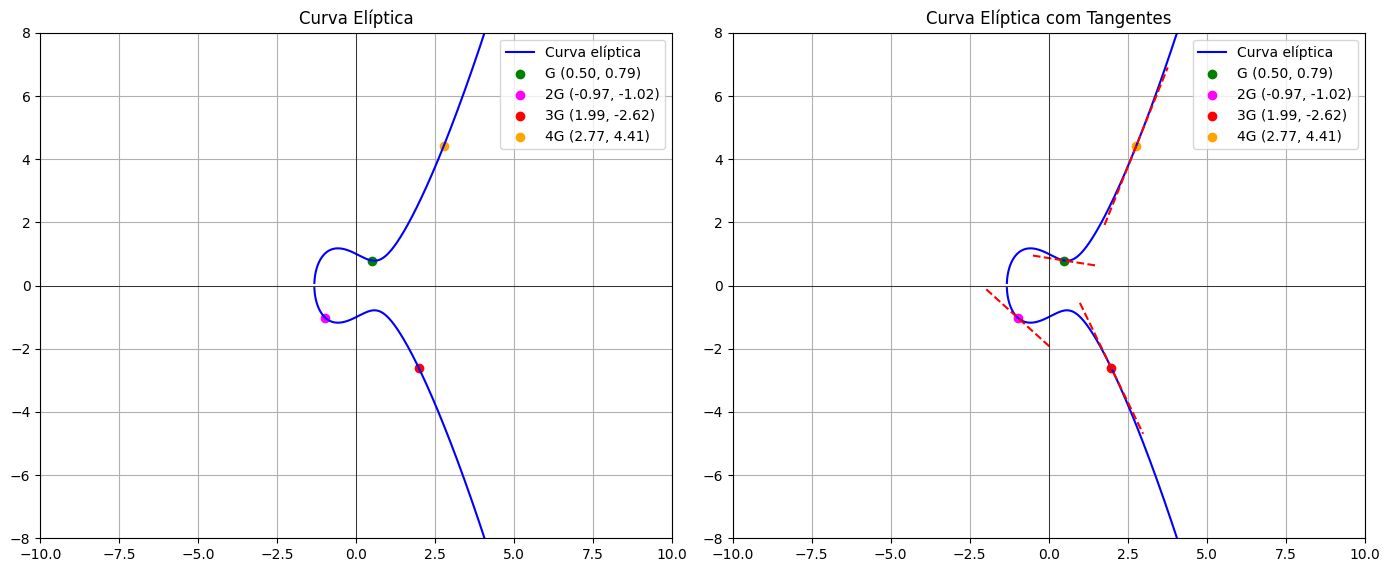

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a equação da curva elíptica: y^2 = x^3 + ax + b
a, b = -1, 1

# Função para calcular os valores de y (lado positivo e negativo)
def elliptic_curve(x, a, b):
    return np.sqrt(x**3 + a*x + b)

# Função para calcular a inclinação da tangente
def tangent_slope(x, y, a):
    return (3 * x**2 + a) / (2 * y)

# Função para somar pontos (sem aritmética modular)
def add_points(P, Q):
    if P == Q:
        lam = (3 * P[0]**2 + a) / (2 * P[1])  # Dobrando o ponto
    else:
        lam = (Q[1] - P[1]) / (Q[0] - P[0])   # Adicionando dois pontos
    x_r = lam**2 - P[0] - Q[0]
    y_r = lam * (P[0] - x_r) - P[1]
    return (x_r, y_r)

# Geração dos valores de x para desenhar a curva
x_vals = np.linspace(-10, 10, 10000)
y_vals = elliptic_curve(x_vals, a, b)
y_vals_neg = -y_vals

# Ponto base G e cálculo dos múltiplos 2G, 3G, 4G
G = (0.5, elliptic_curve(0.5, a, b))
G2 = add_points(G, G)
G3 = add_points(G, G2)
G4 = add_points(G2, G2)

# Função para plotar a curva e os múltiplos dos pontos
def plot_elliptic_curve(ax, title, show_tangents=False):
    ax.plot(x_vals, y_vals, 'b', label="Curva elíptica")
    ax.plot(x_vals, y_vals_neg, 'b')
    ax.scatter(*G, color='green', label=f'G ({G[0]:.2f}, {G[1]:.2f})')
    ax.scatter(*G2, color='magenta', label=f'2G ({G2[0]:.2f}, {G2[1]:.2f})')
    ax.scatter(*G3, color='red', label=f'3G ({G3[0]:.2f}, {G3[1]:.2f})')
    ax.scatter(*G4, color='orange', label=f'4G ({G4[0]:.2f}, {G4[1]:.2f})')

    if show_tangents:
        for point in [G, G2, G3, G4]:
            slope = tangent_slope(*point, a)
            line_x = np.linspace(point[0] - 1, point[0] + 1, 500)
            line_y = slope * (line_x - point[0]) + point[1]
            ax.plot(line_x, line_y, 'r--')

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-8, 8])
    ax.set_aspect('equal')
    ax.legend()

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Segundo gráfico sem tangentes
plot_elliptic_curve(ax1, 'Curva Elíptica')

# Primeiro gráfico com tangentes
plot_elliptic_curve(ax2, 'Curva Elíptica com Tangentes', show_tangents=True)

plt.tight_layout()
plt.show()

**Note:** a partir de um "ponto base" os demais pontos obtidos pela multiplicação escalar começam a ter cada vez maior inclinação de suas respectivas retas tangentes. Esse é o prelúdio do surgimento do "ponto infinito".

O conceito de "ponto infinito" fica mais claro quando se tenta realizar a operação de adição entre um elemento, P = (xp, yp), e o seu inverso, -P = (xp, -yp). Assim, temos P + (-P) = 0. A reta que une P e -P não intersecta a curva elíptica em mais nenhum ponto por ser uma reta vertical.

##Teoria de Campo Finito em Curvas Elípticas
---
Vamos usar a teoria de campo finito para reduzir o conjunto numérico trabalhado (deixá-lo finito) e adicionar o problema do cálculo de logaritmo discreto (facilidade para cálculo em um sentido, mas não em ambos). Dois pontos de interesse à criptografia.

<ipython-input-2-31775617cde0>:24: RuntimeWarning: invalid value encountered in sqrt
  y_vals_real = np.sqrt(x_vals_real**3 + a * x_vals_real + b)


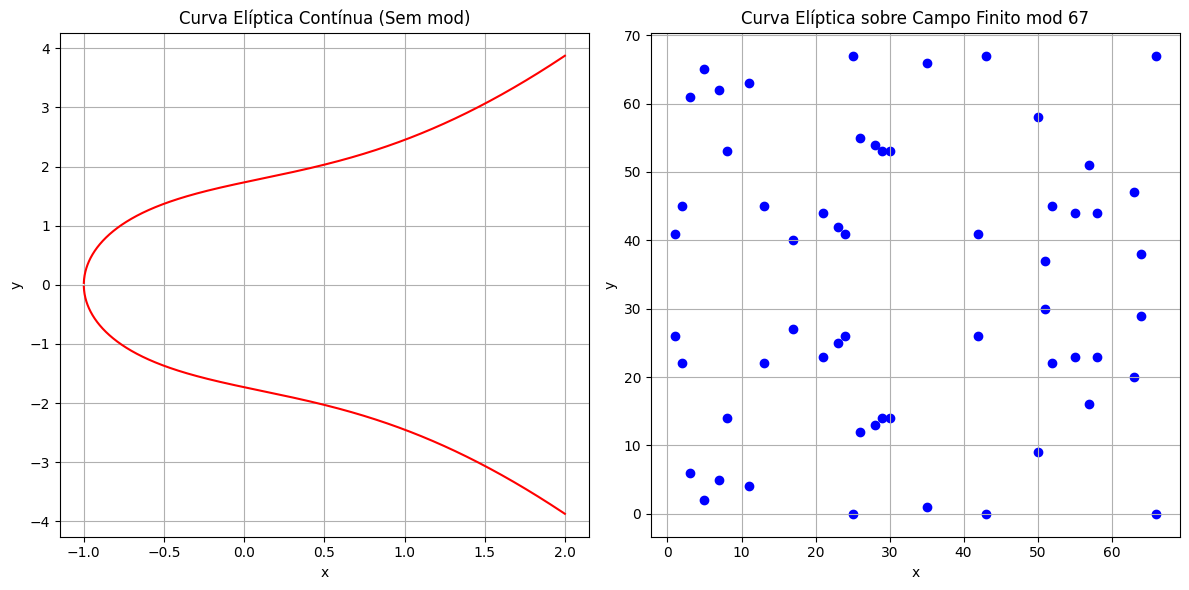

In [2]:
def mod_sqrt(y2, p):
    #Encontra y tal que y^2 ≡ y2 (mod p) se tal y existir.
    for y in range(p):
        if (y * y) % p == y2:
            return y
    return None

# Parâmetros da curva elíptica
a, b, p = 2, 3, 67  # 'p' usado para curva no campo finito

# Usando a função 'mod_sqrt' e a equação modular para calcular pontos
points = []
for x in range(p):
    y2 = (x**3 + a * x + b) % p
    y = mod_sqrt(y2, p)
    if y is not None:
        points.append((x, y))
        points.append((x, p - y))

x_vals_mod, y_vals_mod = zip(*points)

# Curva contínua (espaço real)
x_vals_real = np.linspace(-2, 2, 5000)
y_vals_real = np.sqrt(x_vals_real**3 + a * x_vals_real + b)

# Plotando as curvas lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Curva elíptica contínua (sem mod)
ax1.plot(x_vals_real, y_vals_real, 'r')
ax1.plot(x_vals_real, -y_vals_real, 'r')
ax1.set_title('Curva Elíptica Contínua (Sem mod)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)

# Curva elíptica no campo finito (mod p)
ax2.scatter(x_vals_mod, y_vals_mod, color='blue')
ax2.set_title(f'Curva Elíptica sobre Campo Finito mod {p}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

plt.tight_layout()
plt.show()


##Gerando Chaves
---
A geração de chaves no ECDSA passa pelo crivo de escolha de um subgrupo do corpo anteriormente obtido.

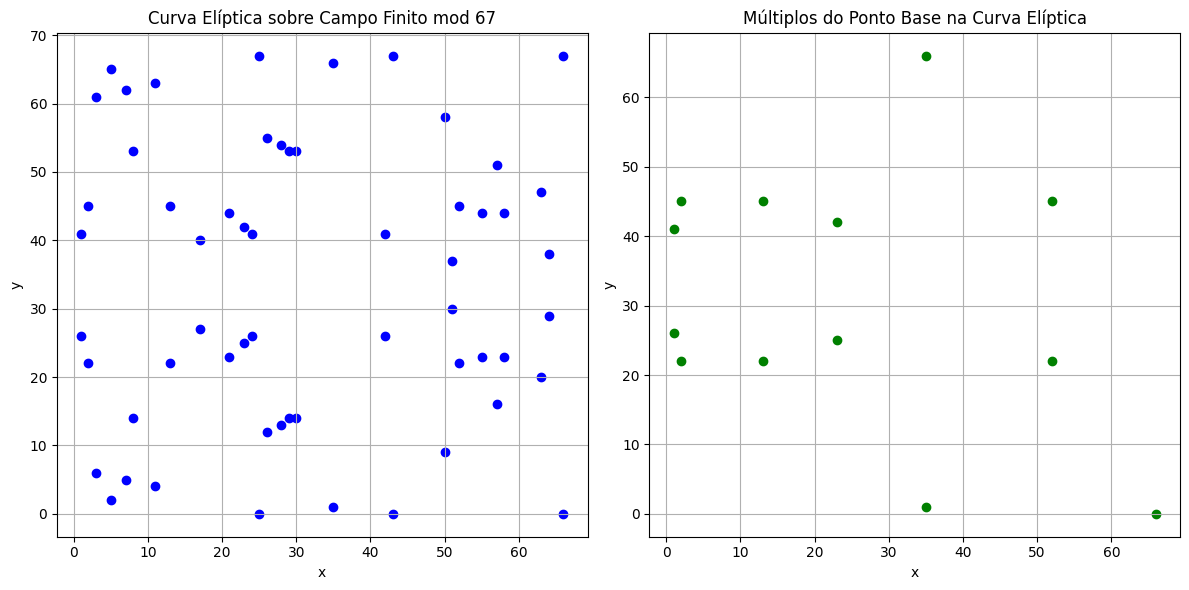

In [6]:
# Definindo os parâmetros da curva elíptica
a, b, p = 2, 3, 67

# Função para calcular o inverso modular
def mod_inv(x, p):
    return pow(x, p - 2, p)

# Função para adicionar dois pontos na curva elíptica sobre o campo finito mod p
def add_points(P, Q, p, a):
    if P == "O":
        return Q
    if Q == "O":
        return P

    x1, y1 = P
    x2, y2 = Q

    if x1 == x2 and (y1 != y2 or y1 == 0):
        return "O"  # P + (-P) = O

    if P == Q:
        # Caso especial: P + P (dobrando um ponto)
        s = (3 * x1**2 + a) * mod_inv(2 * y1, p) % p
    else:
        # Caso geral: P + Q
        s = (y2 - y1) * mod_inv(x2 - x1, p) % p

    x3 = (s**2 - x1 - x2) % p
    y3 = (s * (x1 - x3) - y1) % p

    return (x3, y3)

# Função para calcular os múltiplos de um ponto base na curva elíptica
def calculate_multiples(base_point, p, a):
    multiples = [base_point]
    current_point = base_point

    while True:
        next_point = add_points(current_point, base_point, p, a)
        if next_point == "O" or next_point in multiples:
            break
        multiples.append(next_point)
        current_point = next_point

    return multiples

# Armazenar os pontos (x, y) que satisfazem a equação modular
points = []

for x in range(p):
    y2 = (x**3 + a * x + b) % p
    y = mod_sqrt(y2, p)
    if y is not None:
        points.append((x, y))
        points.append((x, p - y))

x_vals_mod, y_vals_mod = zip(*points)

# Chutar um ponto base (um dos pontos válidos na curva)
base_point = (2, 22)  # Um exemplo de ponto válido

# Calcular todos os múltiplos desse ponto base
multiples = calculate_multiples(base_point, p, a)

# Separar os pontos dos múltiplos
x_vals_mult, y_vals_mult = zip(*multiples)

# Plotando os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de todos os pontos da curva elíptica no campo finito (mod p)
ax1.scatter(x_vals_mod, y_vals_mod, color='blue')
ax1.set_title(f'Curva Elíptica sobre Campo Finito mod {p}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)

# Gráfico dos múltiplos do ponto base
ax2.scatter(x_vals_mult, y_vals_mult, color='green')
ax2.set_title('Múltiplos do Ponto Base na Curva Elíptica')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Imprimir os múltiplos do ponto base
print(f"Base Point: {base_point}")
print("Multiples do ponto base:")
for i, point in enumerate(multiples):
    print(f"{i + 1}: {point}")

Base Point: (2, 22)
Multiples do ponto base:
1: (2, 22)
2: (35, 1)
3: (52, 22)
4: (13, 45)
5: (1, 41)
6: (23, 42)
7: (66, 0)
8: (23, 25)
9: (1, 26)
10: (13, 22)
11: (52, 45)
12: (35, 66)
13: (2, 45)
